# Identity Transformations

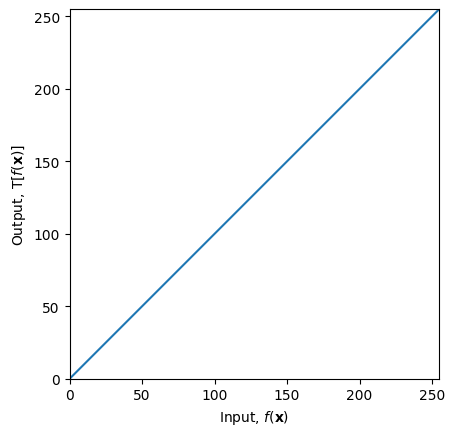

(176, 286)


In [1]:
# Identity Transfrom

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(0, 256).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
# plt.savefig('../../EN2550Lectures/en2550_lec02_point_operations_and_linear_filtering/figures/identity_transform.png')
plt.show()

img_orig = cv.imread('bird.jpeg', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)
cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0) 
image_transformed = cv.LUT(img_orig, transform)
cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Negative Transformation

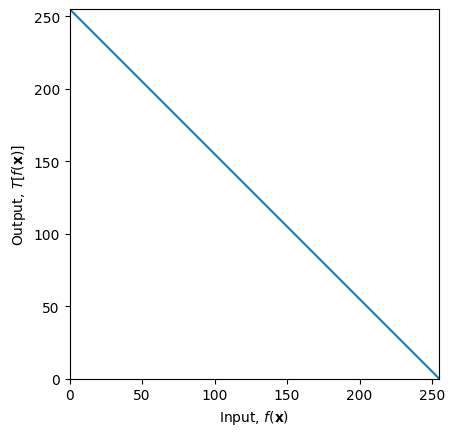

In [20]:
transform = np.arange(255,-1,-1,dtype='uint8')

fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('bird.jpeg',cv.IMREAD_GRAYSCALE)

cv.namedWindow('Image_ori',cv.WINDOW_AUTOSIZE)
cv.imshow('Image_ori',img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig,transform)
cv.imshow('Image_new',image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Intensity Windowing

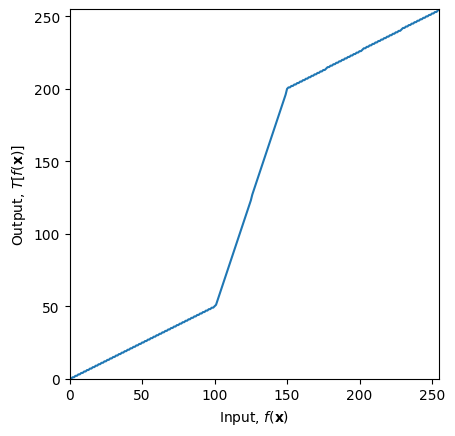

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100, 50), (150, 200)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
t2 = np.linspace(51,200,50).astype('uint8')
t3 = np.linspace(201,255,255-150).astype('uint8')

transform = np.concatenate((t1,t2,t3))

# Create a subplot for plotting
fig, ax = plt.subplots()
# Plot the transformation
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()


image_original = cv.imread('bird.jpeg',cv.IMREAD_GRAYSCALE)

cv.imshow('Orignal Image',image_original)
cv.waitKey(0)
cv.destroyAllWindows()


transformed_image = cv.LUT(image_original,transform)
cv.imshow('transformed',transformed_image)
cv.waitKey(0)
cv.destroyAllWindows()


# Gamma Correction

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image_original = cv.imread('tom.jpeg',cv.IMREAD_COLOR)

cv.imshow("Tom original",image_original)

gamma = 1.6
table = np.array([(i/255)**gamma*255 for i in range(0,256)]).astype('uint8')

gamma_applied_img = cv.LUT(image_original,table)


cv.imshow("gamma applied",gamma_applied_img)

cv.waitKey(0)
cv.destroyAllWindows()


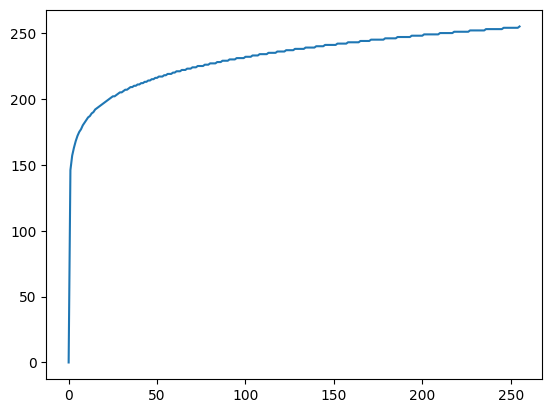

In [19]:
plt.plot(table)

# Histagram of a Grayscale Image


(0.0, 256.0)

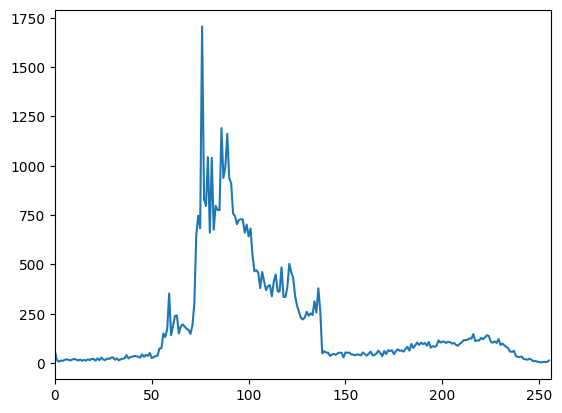

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('bird.jpeg',cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])


# Histogram of a colored Image

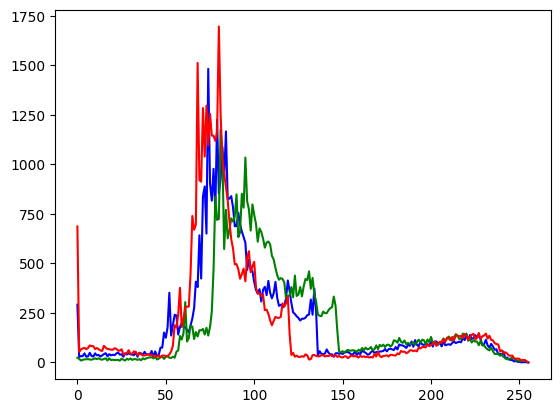

In [48]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('bird.jpeg',cv.IMREAD_COLOR)

color = ('b','g','r')

for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None,[256],[0,255])
    plt.plot(hist,color=c)


# Gamma and Histograms

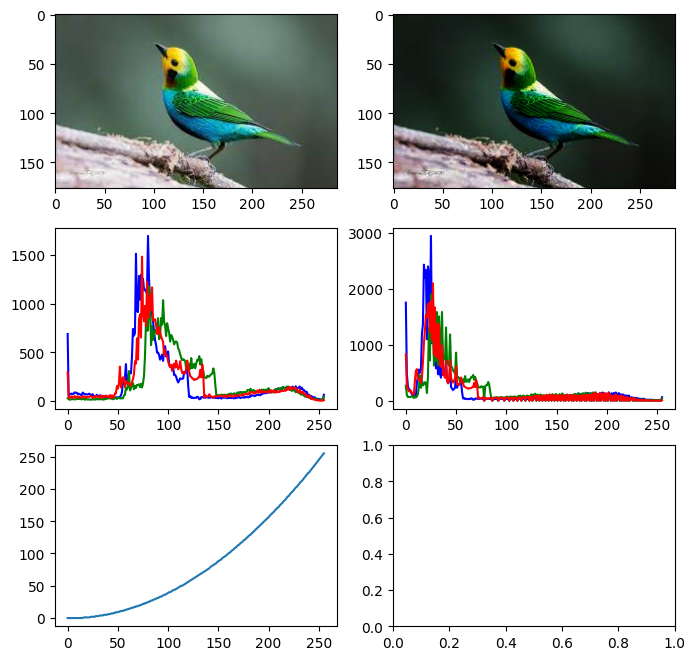

In [57]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image_original = cv.imread('bird.jpeg',cv.IMREAD_COLOR)

gamma =2 
table =np.array([(i/255)**gamma*255 for i in range(0,256)]).astype('uint8')

image_gamma = cv.LUT(image_original,table)


f,ax = plt.subplots(3,2,figsize = (8,8))
image_original = cv.cvtColor(image_original,cv.COLOR_BGR2RGB)
image_gamma = cv.cvtColor(image_gamma,cv.COLOR_BGR2RGB)

ax[0,0].imshow(image_original)
ax[0,1].imshow(image_gamma)


color =('b','g','r')

for i,c in enumerate(color):
    hist_orig = cv.calcHist([image_original],[i],None,[256],[0,256])
    ax[1,0].plot(hist_orig,color=c)
    hist_g = cv.calcHist([image_gamma],[i],None,[256],[0,256])
    ax[1,1].plot(hist_g,color=c)


ax[2,0].plot(table)


# Gamma Correction with OpenCV

In [63]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('bird.jpeg',cv.IMREAD_COLOR)/255

gamma =4


cv.imshow('abc',f)
cv.imshow('cbc',f**gamma)
cv.waitKey(0)
cv.destroyAllWindows()



# Histagram Equalization

(array([  63.,   16.,    7.,   13.,   11.,   16.,   19.,   17.,   13.,
          18.,   21.,   18.,   13.,   18.,   12.,   16.,   12.,   19.,
          15.,   21.,   21.,   12.,   24.,   14.,   28.,   18.,   15.,
          23.,   21.,   27.,   29.,   17.,   24.,   14.,   19.,   22.,
          24.,   40.,   23.,   31.,   32.,   36.,   35.,   32.,   27.,
          44.,   31.,   42.,   36.,   51.,   25.,   30.,   35.,   37.,
          74.,   75.,  150.,  132.,  172.,  353.,  141.,  188.,  239.,
         241.,  150.,  187.,  196.,  185.,  174.,  168.,  148.,  190.,
         303.,  650.,  747.,  683., 1706.,  831.,  796., 1044.,  661.,
        1040.,  676.,  797.,  776.,  775., 1191.,  938.,  995., 1162.,
         936.,  912.,  758.,  745.,  704.,  726.,  729.,  728.,  661.,
         702.,  642.,  682.,  549.,  465.,  471.,  458.,  380.,  462.,
         414.,  370.,  390.,  395.,  338.,  413.,  449.,  364.,  362.,
         485.,  335.,  335.,  385.,  503.,  461.,  431.,  341.,  291.,
      

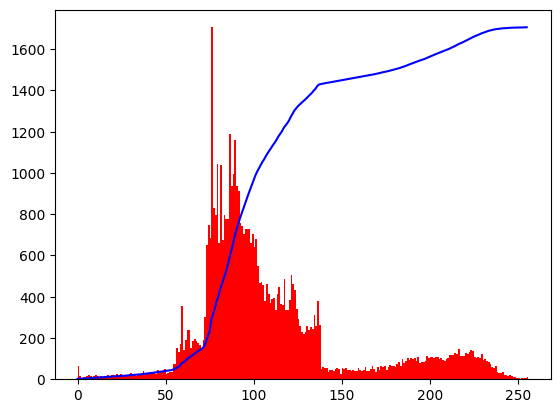

In [66]:
# Histogram Equalization
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('bird.jpeg',cv.IMREAD_GRAYSCALE)


hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')

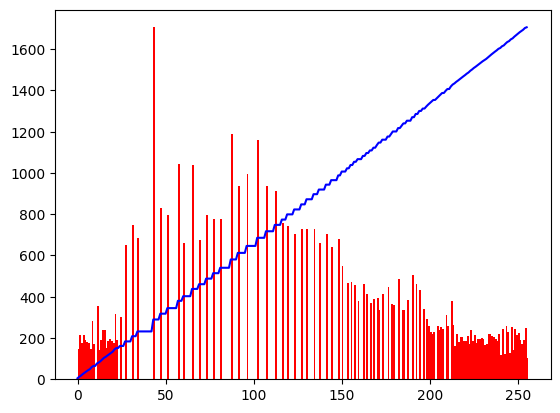

In [71]:
equ = cv.equalizeHist(img)

hist,bins = np.histogram(equ.ravel(),256,[0,256])    # ravel -> flatten the img into 1D array
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')


In [80]:
img = cv.imread('bird.jpeg',cv.IMREAD_GRAYSCALE)
img1 = cv.equalizeHist(img)

cv.imshow('sds',img)
cv.imshow('ddd',img1)
cv.waitKey(0)
cv.destroyAllWindows()
